In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Perform EDA

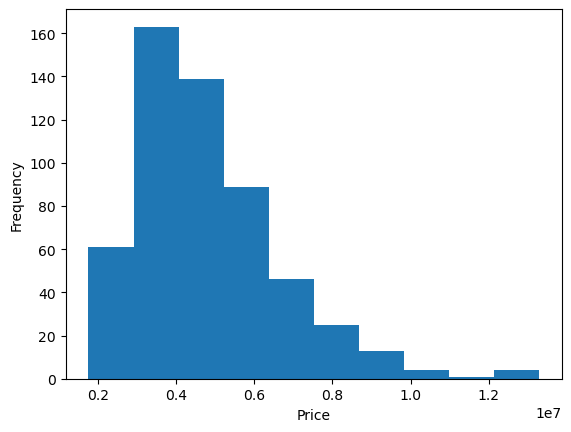

In [15]:
plt.hist(df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

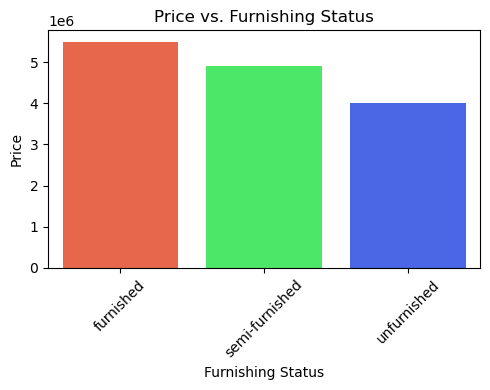

In [17]:
custom_colour = ['#FF5733', '#33FF57', '#3357FF']
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='furnishingstatus', y='price', errorbar=None, hue = 'furnishingstatus', palette = custom_colour)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price vs. Furnishing Status')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

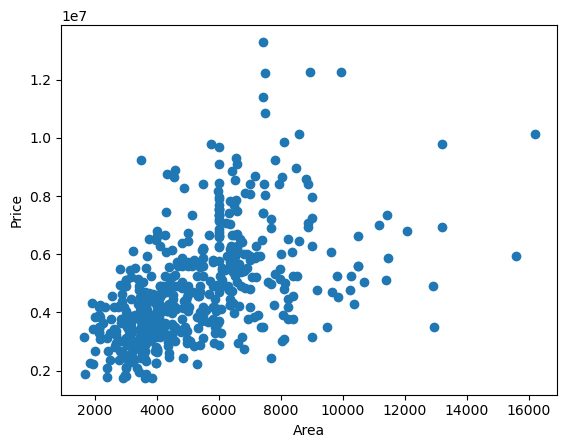

In [19]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


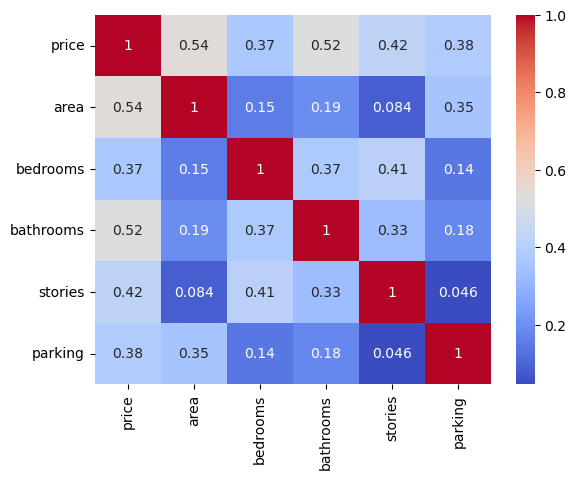

In [21]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()


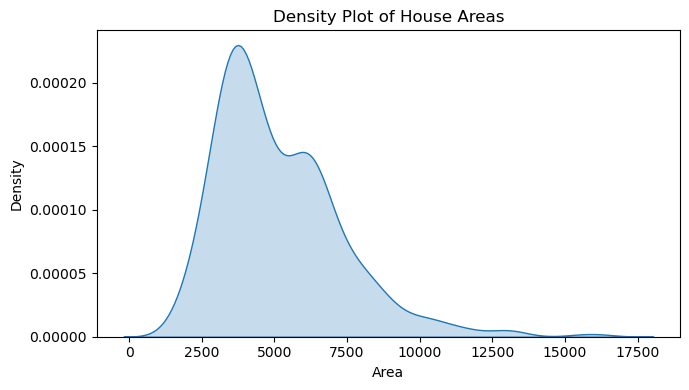

In [23]:
plt.figure(figsize=(7, 4))
sns.kdeplot(df['area'], fill=True )
plt.title('Density Plot of House Areas')
plt.xlabel('Area')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


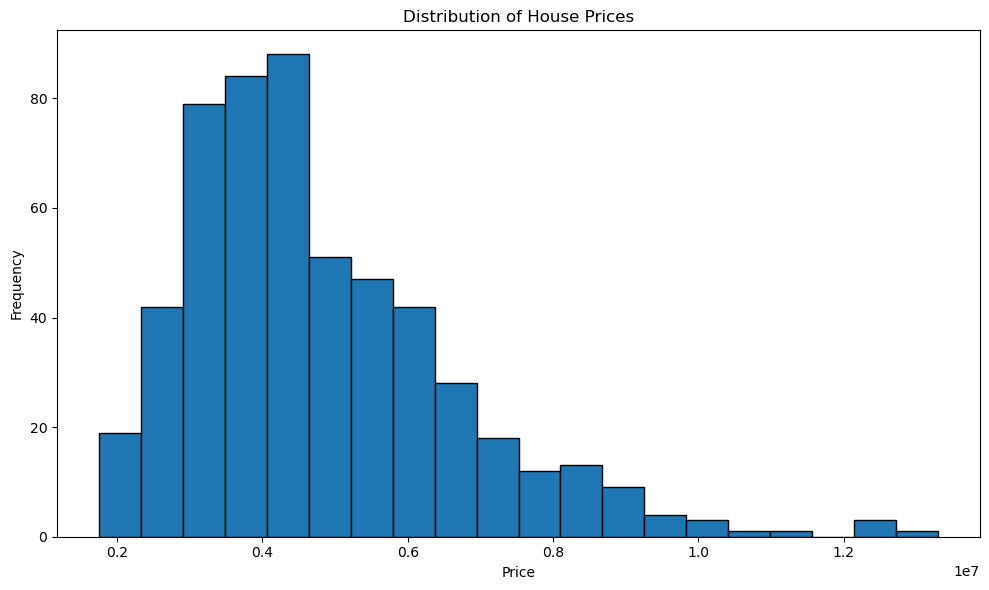

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [27]:
categorical_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [34]:
df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [36]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [40]:
df[categorical_col] = df[categorical_col].apply(binary_map)
df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [44]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [46]:
dummy_col = pd.get_dummies(df['furnishingstatus'])
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [48]:
dummy_col = pd.get_dummies(df['furnishingstatus'], drop_first=True)
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [50]:
df = pd.concat([df, dummy_col], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [52]:
df.drop(['furnishingstatus'], axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [54]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [58]:
np.random.seed(0)

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,False,False
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,False,False
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,False,True


In [68]:
df_train.shape

(381, 14)

In [70]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [72]:
df_test.shape

(164, 14)

scaler = MinMaxScaler()

In [76]:
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [78]:
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [126]:
df_train.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True
267,0.271383,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,True,False
263,0.187610,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0,True,False
433,0.144667,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,True,False
217,0.442274,0.4,0.0,0.333333,1,0,0,0,1,0.666667,1,False,False
154,0.159627,0.4,0.5,0.333333,1,0,0,0,0,0.666667,0,True,False


In [82]:
y_train = df_train.pop('price')

x_train = df_train

In [84]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [86]:
linear_regression = LinearRegression()

In [88]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [90]:
coefficients = linear_regression.coef_

print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [96]:
score = linear_regression.score(x_train, y_train)
#(R²)
print(score)

0.6814893088451202


# Scaling Test Data

In [99]:

col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [101]:
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

In [103]:
y_test = df_test.pop('price')
x_test = df_test 

In [105]:
y_test

265    0.247651
54     0.530201
171    0.328859
244    0.261745
268    0.245638
         ...   
413    0.154362
191    0.308725
310    0.221477
46     0.546980
50     0.536913
Name: price, Length: 164, dtype: float64

In [107]:
prediction = linear_regression.predict(x_test)

In [109]:
r2 = r2_score(y_test, prediction)

In [111]:
y_test.shape

(164,)

In [113]:
y_test_matrix = y_test.values.reshape(-1, 1)

In [115]:
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [117]:
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


# Graph

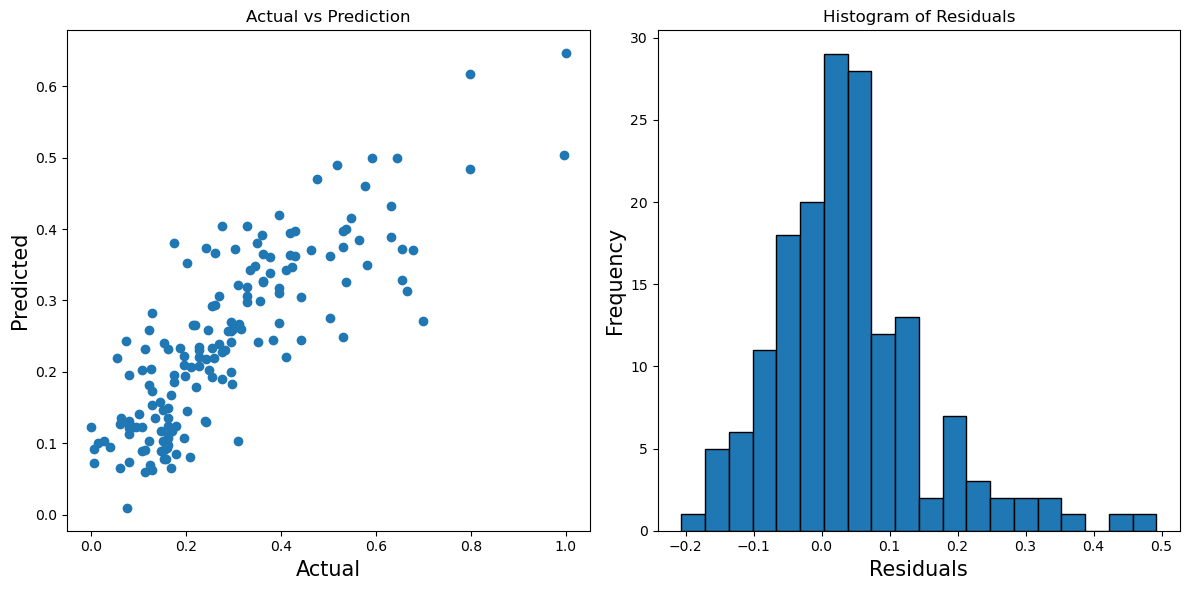

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Scatterplot
ax1.scatter(y_test, prediction)
ax1.set_title('Actual vs Prediction')
ax1.set_xlabel('Actual', fontsize=15)
ax1.set_ylabel('Predicted', fontsize=15)

#Histogram
residuals = y_test - prediction
ax2.hist(residuals, bins=20, edgecolor='black')
ax2.set_title('Histogram of Residuals')
ax2.set_xlabel('Residuals', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)


plt.tight_layout()
plt.show()